(28, 28)
(1, 784)


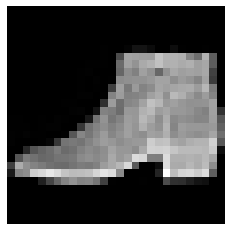

In [11]:
# fashion data 

import matplotlib.image as mimg
import matplotlib.pyplot as plt 
from sklearn import decomposition,metrics,svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
path = './train/10071.png'

im = mimg.imread(path)

Im = im[:,:,0] # first channel
print(Im.shape)

plt.figure(1)
plt.imshow(Im,cmap='gray')
plt.axis('off')



# convert this Im into feature 
feat = Im.reshape(1,-1) # 1 row and all values of image pixels are in columns 
print(feat.shape)


In [18]:
# whole dataset process 

path1 = "./train.csv"
labl = pd.read_csv(path1)

print(labl.head())
samples = 60000
X = np.zeros((samples,28*28))
Images = np.zeros((samples,28,28))
y = np.zeros((samples))

for i in range(1,samples+1):
    path = './train/%d.png'%(i)
    im = mimg.imread(path)
    Im = im[:,:,0] # first channel
    feat = Im.reshape(1,-1)
    X[i-1,:]=feat
    Images[i-1,:,:]=Im
    
# labels 

y = labl['label'].values[:samples]

print(X.shape,y.shape)
    
    
    



   id  label
0   1      9
1   2      0
2   3      0
3   4      3
4   5      0
(60000, 784) (60000,)


In [19]:
# apply the PCA on the training data 
pcaModel = decomposition.PCA(n_components=15,random_state=2) 
XMod = pcaModel.fit_transform(X)

# creating ICA model 
icaModel = decomposition.FastICA(n_components=15,random_state=2)
XModICA = icaModel.fit_transform(X)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=2)
XtrainPCA,XtestPCA,ytrainPCA,ytestPCA = train_test_split(XMod,y,test_size=0.2,random_state=2)
XtrainICA,XtestICA,ytrainICA,ytestICA = train_test_split(XModICA,y,test_size=0.2,random_state=2)




In [20]:
# SVM model PCA

svmModel = svm.SVC(kernel="rbf")
svmModel = svmModel.fit(XtrainPCA,ytrainPCA)
opPCA = svmModel.predict(XtestPCA)
# acc
accPCA = metrics.accuracy_score(ytestPCA,opPCA)
print("Accuracy PCA: ",accPCA)

Accuracy PCA:  0.85025


In [21]:
# SVM model ICA

svmModelIca = svm.SVC(kernel="rbf")
svmModelIca = svmModel.fit(XtrainICA,ytrainICA)
opIca = svmModel.predict(XtestICA)
# acc
accIca = metrics.accuracy_score(ytestICA,opIca)
print("Accuracy ICA: ",accIca)

Accuracy ICA:  0.8608333333333333


In [22]:
# SVM model without DR

svmModelIca = svm.SVC(kernel="rbf")
svmModelIca = svmModel.fit(Xtrain,ytrain)
op = svmModel.predict(Xtest)
# acc
acc = metrics.accuracy_score(ytest,op)
print("Accuracy: ",acc)

Accuracy:  0.8875833333333333
